# Курсовая работа.
*Pandas и Matplotlib*


<br><br>
**Описание работы:**

Стоит задача подготовки аналитического отчета, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В задачи входит оформление описательного блока по каждому курсу на основании рассчитанных показателей, расчет потенциальной нагрузки на преподавателей. Далее анализ качества контента курсов, выявление проблемных модулей. Также стоит задача выявить потенциальную сезонность. Каждый из пунктов анализа сопровождается аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Нужно объединить датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет для расчета среднего возраста студентов курсов. <br> <br>
Необходимая информация: <br>
1. **(p)** Нужно посчитать:
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Нужно построить bar-chart, отражающий количество студентов на каждом курсе.
3. **(m)** Нужно построить горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений описать данные
_____________________________________________________________________


In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
# Открытие файлов 

df_main = pd.read_csv('progress_phases.csv')

df_progresses = pd.read_csv('progresses.csv')
df_progresses.rename(columns={'id': 'progress_id'}, inplace=True)

df_course_contents = pd.read_csv('course_contents.csv')

df_courses = pd.read_csv('courses.csv').iloc[:, 1:]
df_courses.rename(columns={'id':'course_id'}, inplace=True)

df_students = pd.read_csv('students.csv')

In [3]:
# Слияние таблиц в один датафрейм

df = df_main.merge(df_progresses, on='progress_id', how='inner')
df = df.merge(df_courses, on='course_id', how='inner')
df = df.merge(df_course_contents, on=['module_number', 'course_id', 'lesson_number'], how='inner')
df

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.19862+00,2019-07-11 08:03:09.222385+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00,2018-07-27 16:13:55.086871+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00,2019-04-24 18:44:57.507857+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02.766878+00,NaN,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True
350673,56a9cb904c20cd2fcfa8104f87f988a7,9,14,wait,2019-07-09 05:44:55.574679+00,NaN,ed93dfa830d97cf67eb047dd7a4aa181,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True
350674,f6216204f2c65eea37f913cfa5e4eb6a,9,15,done,2019-07-03 09:49:03.510925+00,2019-07-03 18:22:44.796645+00,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False
350675,45289b36f4827d49d9d3757fc9486ca0,9,15,done,2019-07-11 12:18:11.684534+00,2019-07-11 17:46:08.426039+00,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False


In [4]:
# Общее кол-во курсов в датасете

len(df['title'].unique())

15

In [5]:
# Количество модулей на каждом курсе

df.groupby('title')['module_number'].nunique()

title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64

In [6]:
# Количество уроков в каждом модуле на каждом курсе

ls = df.groupby(['title', 'module_number'])['lesson_title'].nunique()
ls

title                          module_number
Excel Базовый                  1                11
                               2                 7
                               3                 3
                               4                 7
                               5                 5
                                                ..
Руководитель digital-проектов  13                4
                               14                7
                               15               12
                               16                8
                               17                4
Name: lesson_title, Length: 229, dtype: int64

In [7]:
# Медианное количество уроков в модуле на каждом курсе

ls.groupby(['module_number']).median()

module_number
1     7.0
2     6.0
3     4.0
4     5.0
5     5.0
6     5.0
7     5.0
8     5.0
9     5.0
10    5.0
11    5.0
12    5.0
13    5.0
14    4.5
15    5.0
16    3.0
17    1.0
18    1.0
19    2.5
20    1.0
21    1.0
Name: lesson_title, dtype: float64

In [8]:
# Количество учеников на каждом курсе без визуализации

qty_st_c = df.groupby(['title', 'field'])['student_id'].nunique().reset_index().sort_values('student_id', ascending=False)
qty_st_c

,title,field,student_id
13,Интернет-маркетолог от Ingate,Marketing,2168
11,Веб-дизайн с нуля 2.0,Design,2014
8,Веб-вёрстка для начинающих 2.0,Development,2004
9,Веб-дизайн PRO 2.0,Design,1711
6,UX-дизайн,Design,1151
3,JavaScript с нуля,Development,966
4,PHP-разработчик с 0 до PRO. Часть 1,Development,854
0,Excel Базовый,Business,782
1,Java-разработчик,Development,763
14,Руководитель digital-проектов,Business,685


In [9]:
# Работа с датафреймом со студентами

df_st = df_students.dropna(axis=0)
df_stud = df[['student_id', 'course_id', 'title']].rename(columns={'student_id': 'id'})
df_st = df_st.merge(df_stud, on='id', how='inner')
df_st = df_st.drop_duplicates()
df_st['birthday'] = df_st['birthday'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_st

,id_,id,city,birthday,course_id,title
0,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15 00:00:00,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик
3,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24 00:00:00,480d25ad36878fce09e7aada316ba1a6,Веб-разработчик
4,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24 00:00:00,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0
5,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24 00:00:00,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый
48,13568,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16 00:00:00,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн
...,...,...,...,...,...,...
261614,114136,0a5e2bb4947c56dfba3c60bd3af54a6f,Самара/Москва,1988-03-04 00:00:00,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн
261635,115361,d4b8116ba1d159c4b8b58ae77ad26578,Москва,1995-12-04 00:00:00,842218e7c983795934bbe4533c0888c8,SMM-маркетолог от А до Я
261641,116725,3d7d520c6d739fc8cb844ebdc305743b,Москва,1990-02-21 00:00:00,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн
261687,119731,859b49d2953c191275061f41f1ba09be,Краснодар,1990-01-03 00:00:00,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля


In [10]:
# Минимальный, максимальный, средний, медианный возраст студентов

df_st['age'] = df_st['birthday'].apply(lambda x: (datetime.now() - x).days//365.25)
df_st['age'].agg(['min', 'max', 'mean', 'median']) 

# какая-то проблема с датами для мин/макс

min      -7165.000000
max       1938.000000
mean        30.672761
median      31.000000
Name: age, dtype: float64

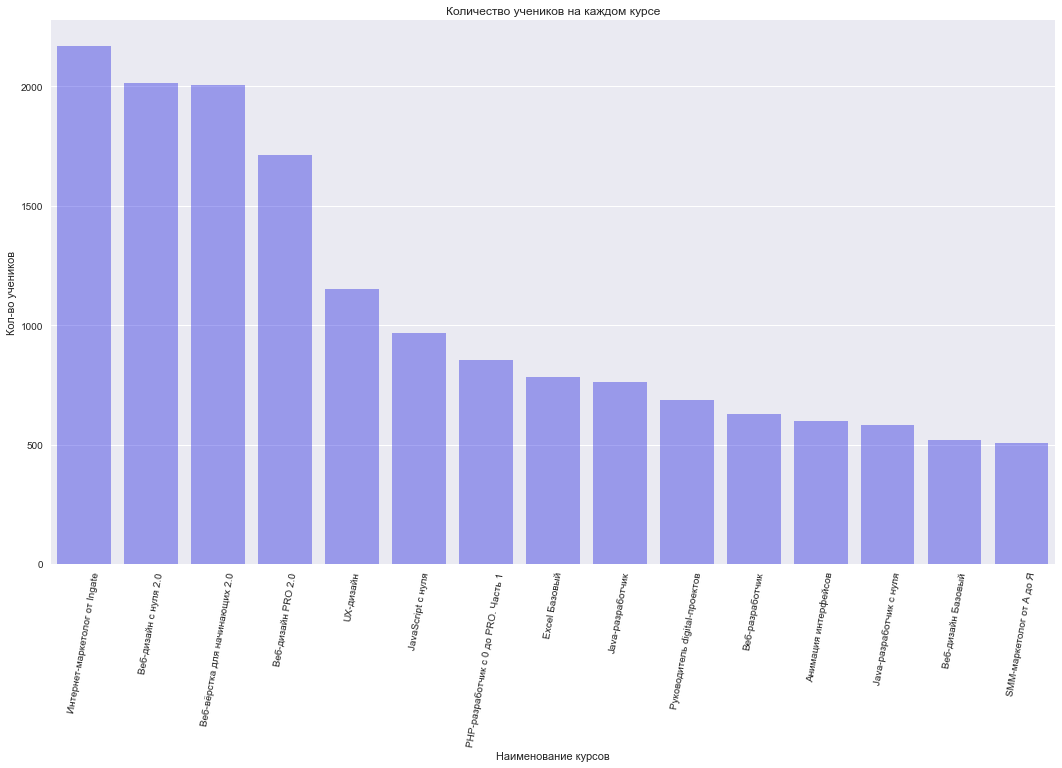

In [101]:
# Количество учеников на каждом курсе с визуализацией

fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(data=qty_st_c, x='title', y='student_id', ax=ax, color='blue', alpha=0.4)
ax.set_title('Количество учеников на каждом курсе')
ax.set_xlabel('Наименование курсов')
ax.set_ylabel('Кол-во учеников')
ax.tick_params(axis = 'x', rotation = 80)
plt.show()

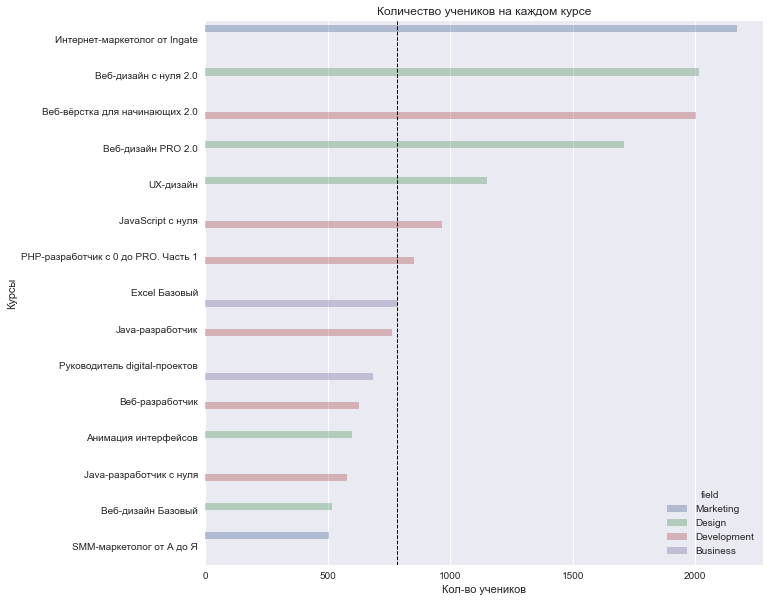

In [12]:
# Количество учеников на каждом курсе с продвинутой визуализацией
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=qty_st_c, x='student_id', y='title', ax=ax, alpha=0.4, hue='field') # При alpha =0.1 почти ничего не видно.
ax.axvline(x=qty_st_c['student_id'].median(), color='black', linewidth=1, linestyle='--')
ax.set_title('Количество учеников на каждом курсе')
ax.set_xlabel('Кол-во учеников')
ax.set_ylabel('Курсы')
plt.show()

### Выводы модуля 1
1. Общее кол-во курсов - 15
2. Средний и медианный возраст студентов: 30-31 год
3. Самый популярный курс: Интернет-маркетолог (2100+ чел.), самый непопулярный: SMM-маркетолог (500+ чел.)
4. Медианное значение студентов на курсах ~ 800 чел.
5. Не наблюдается тренд в сфере к курсам по численности студентов.

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны.
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделать аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [131]:
# Рассчет прироста студентов на каждом курсе в каждом месяце за всю историю

first_hw = df[df['is_homework'] == True].groupby(['title','module_number'])['lesson_number'].min().reset_index().groupby('title').first()
hw = pd.merge(first_hw, df, on=['title','module_number', 'lesson_number'], how='left')
hw['start_date'] = hw['start_date'].astype('datetime64[D]')
hw.sort_values('start_date', inplace=True)
hw['start_date'] = hw['start_date'].dt.to_period('M').astype(str)

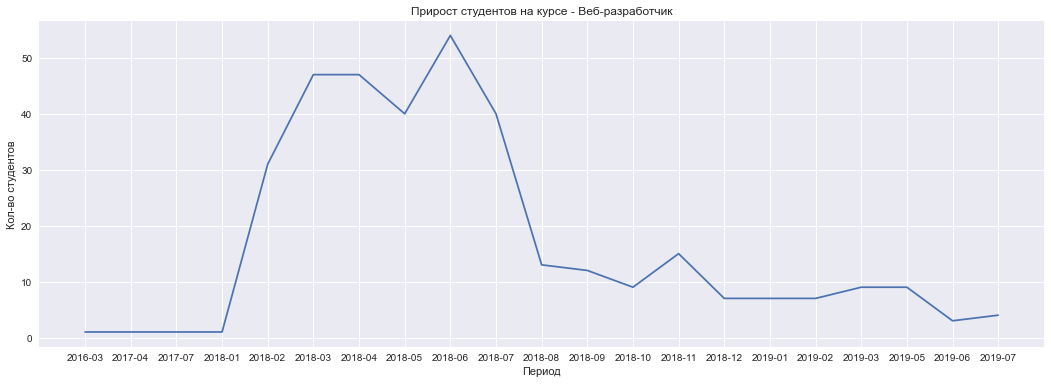

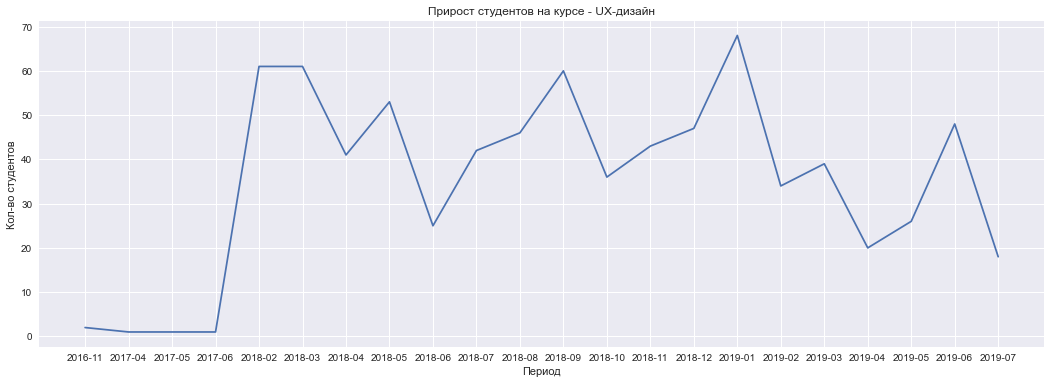

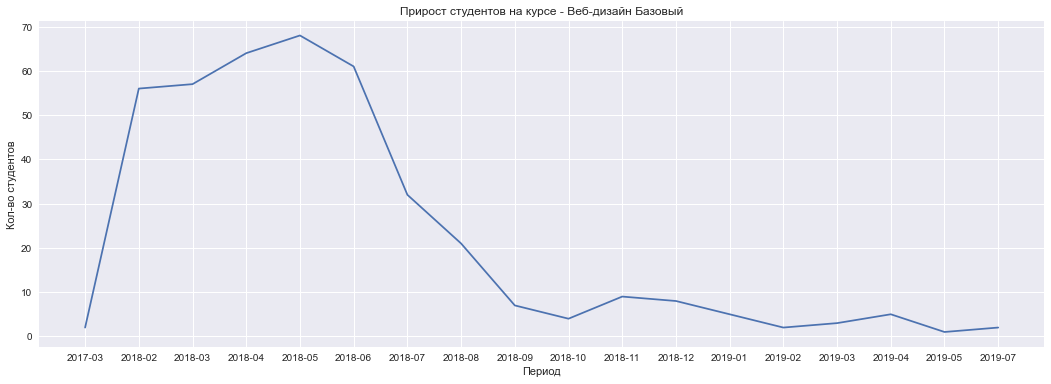

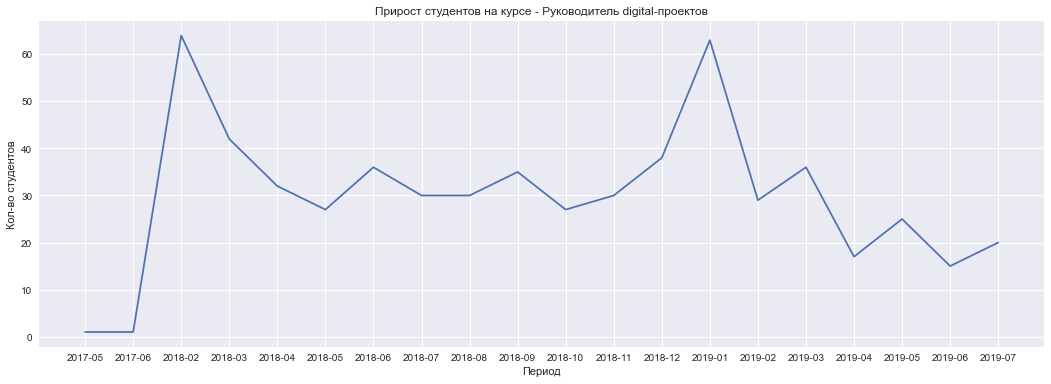

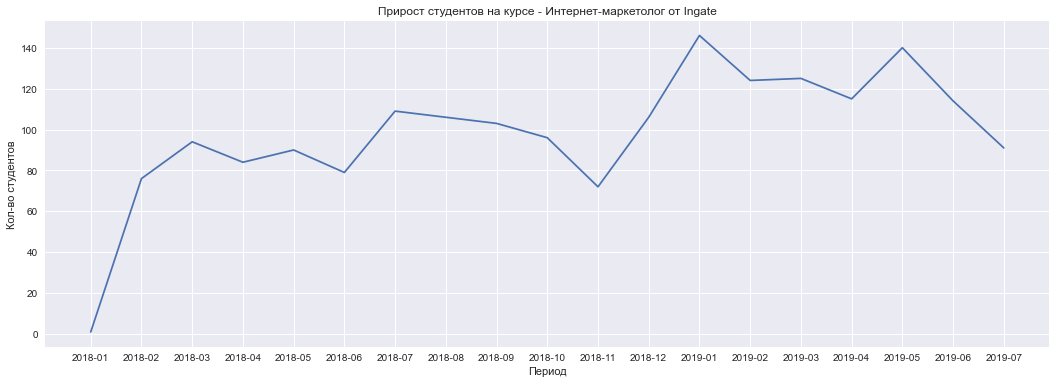

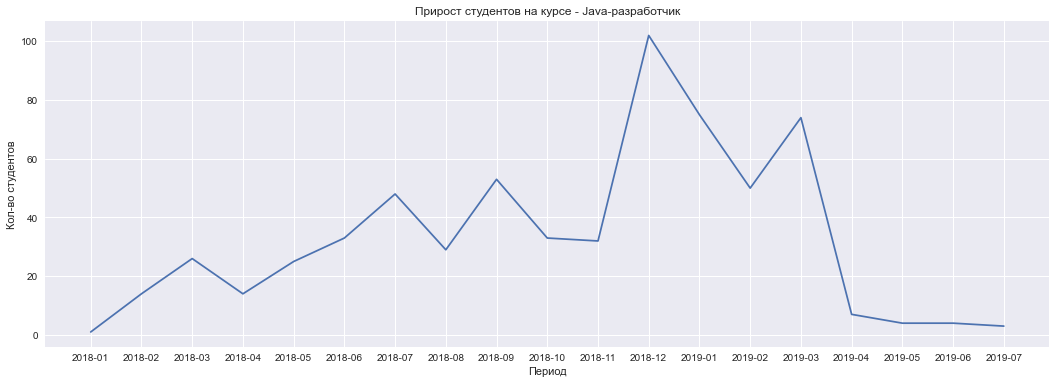

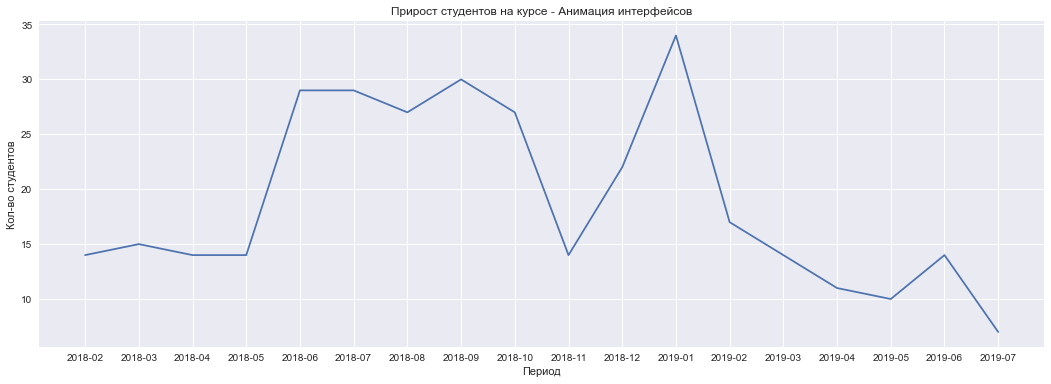

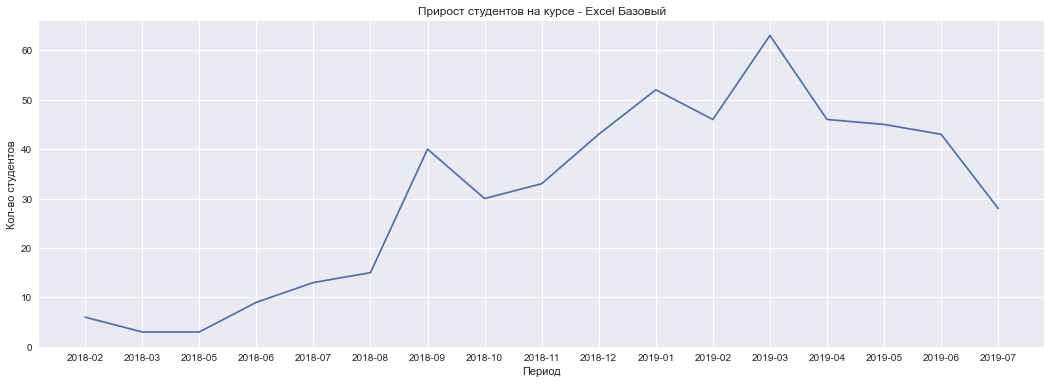

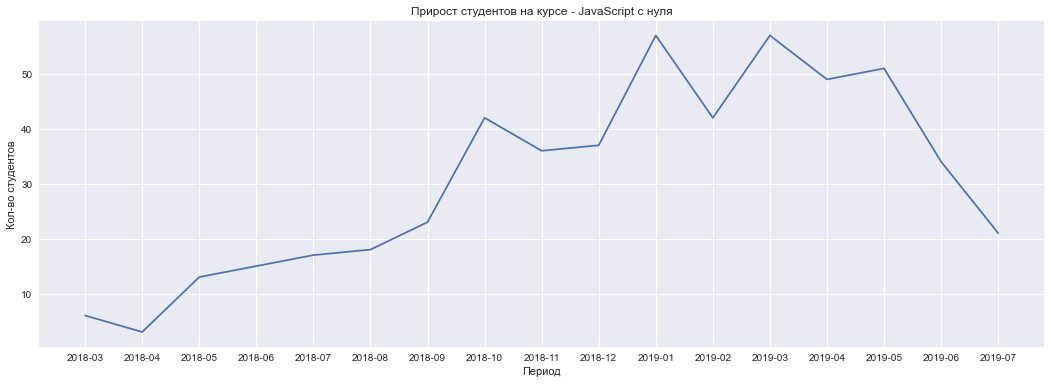

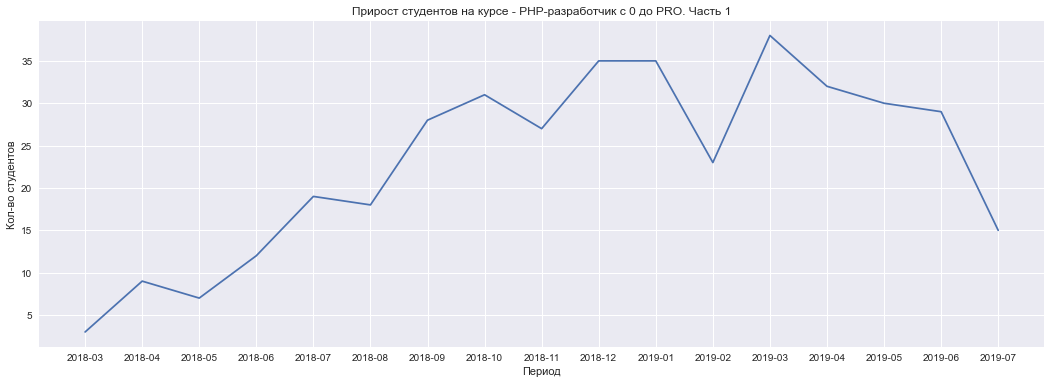

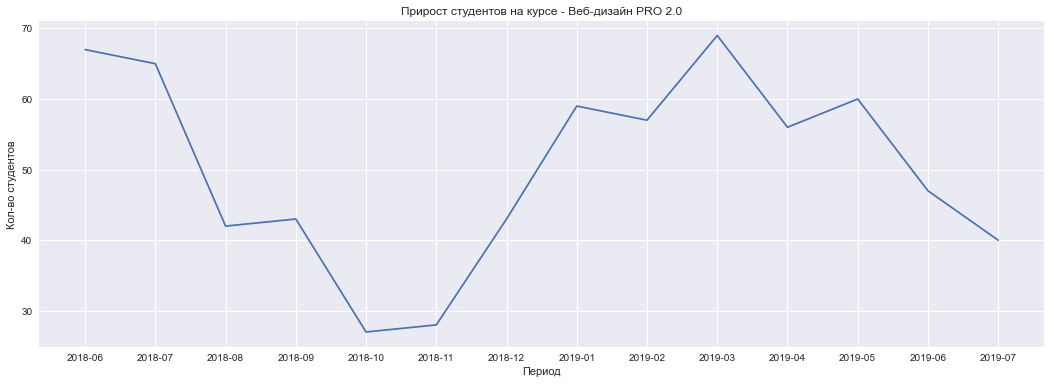

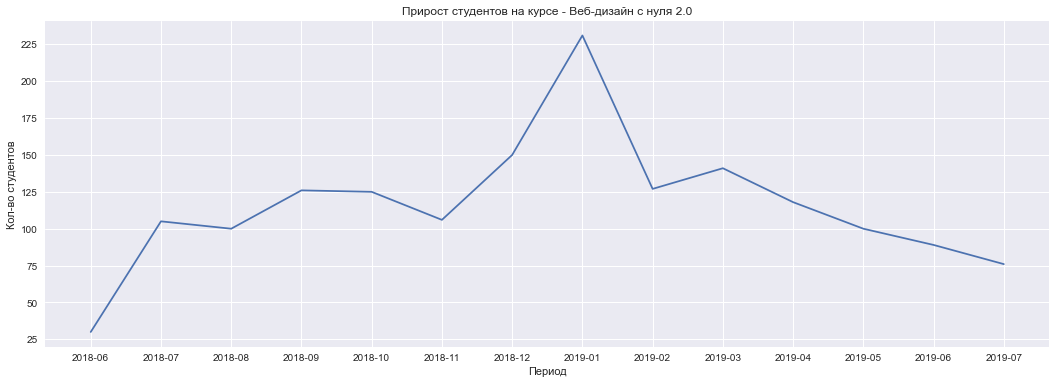

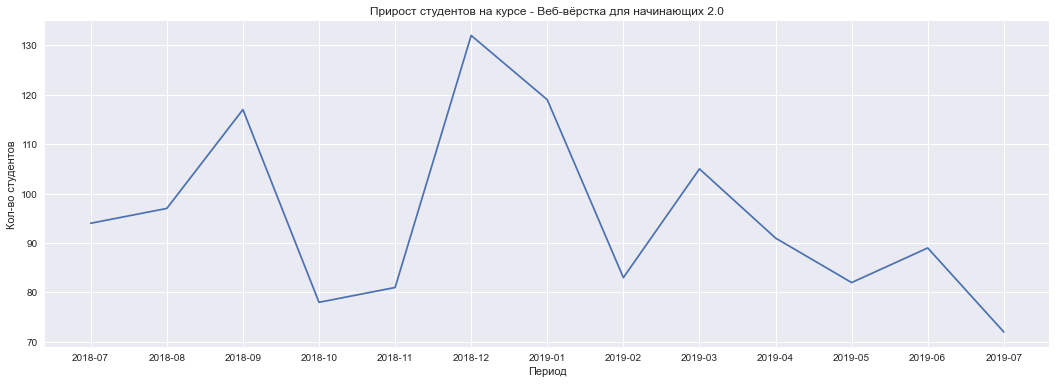

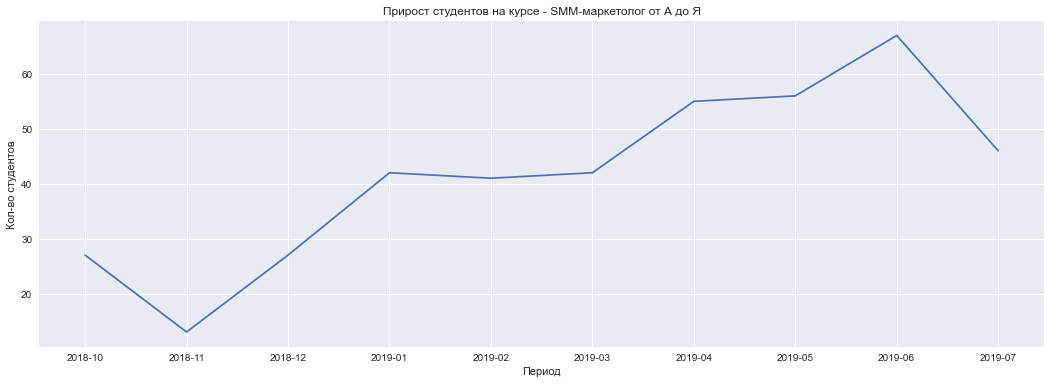

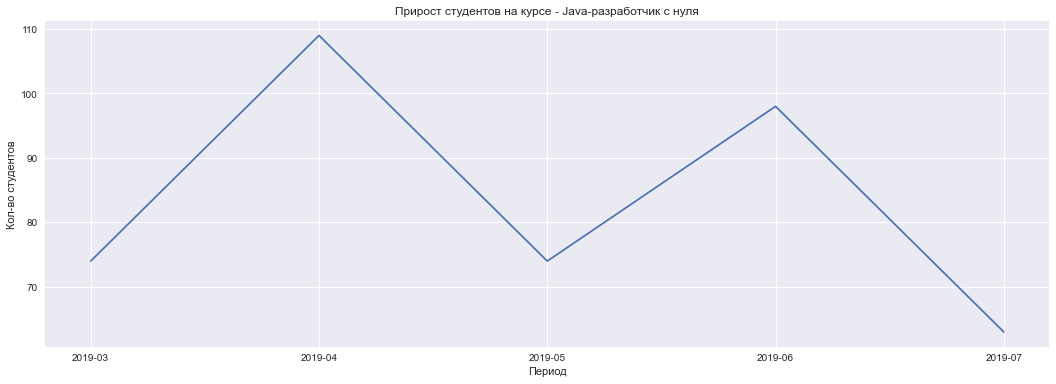

In [99]:
# Line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков

courses = list(hw['title'].unique())

for course in courses:
    data = hw[hw['title']== course].groupby(['start_date'])['student_id'].count().reset_index()
    fig, ax = plt.subplots(figsize=(18,6))
    sns.lineplot(data=data, x=data['start_date'], y=data['student_id'])
    ax.set_title(f'Прирост студентов на курсе - {course}')
    ax.set_xlabel('Период')
    ax.set_ylabel('Кол-во студентов')
    plt.show()

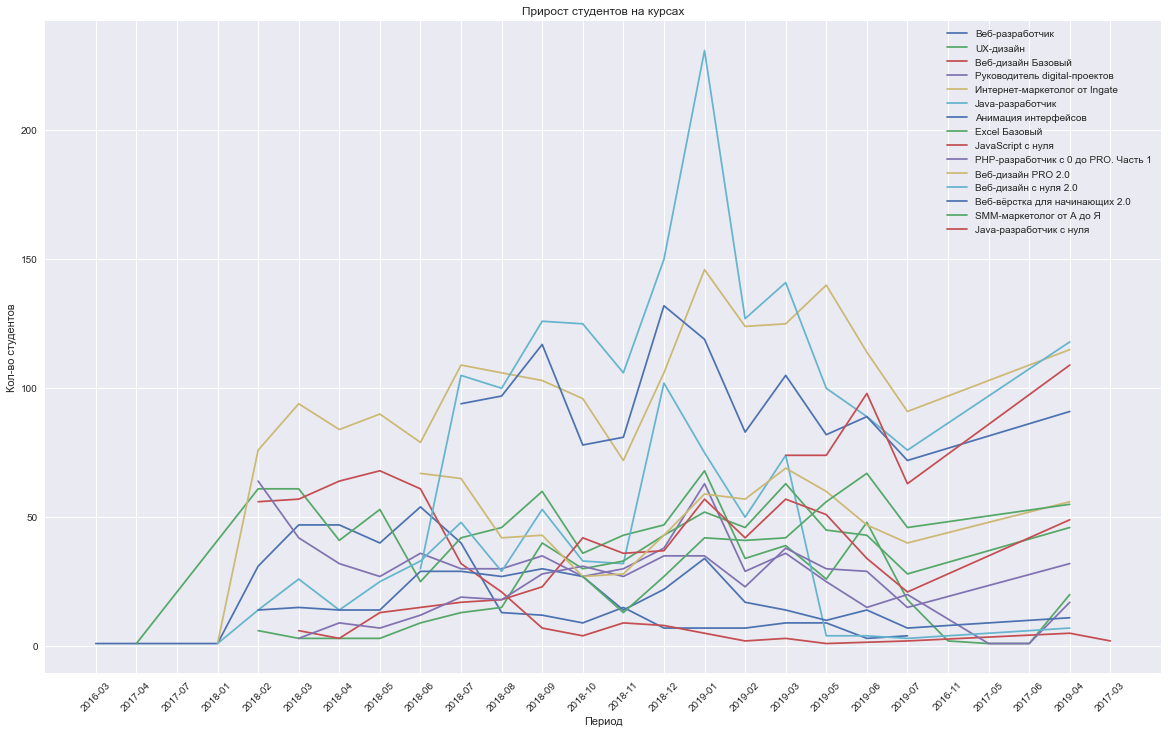

In [97]:
# line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике.

fig, ax = plt.subplots(figsize=(20,12))
for course in courses:
    data = hw[hw['title']== course].groupby(['start_date'])['student_id'].count().reset_index()
    sns.lineplot(data=data, x=data['start_date'], y=data['student_id'])
ax.set_title(f'Прирост студентов на курсах')
ax.set_xlabel('Период')
ax.set_ylabel('Кол-во студентов')
ax.tick_params(axis = 'x', rotation = 45)
ax.legend(courses)
plt.show()

In [133]:
# Рассчет количества прогрессов по выполнению домашних работ в каждом месяце за всю историю

hw['finish_date'].fillna(datetime.today(), inplace=True)
hw['finish_date'] = pd.to_datetime(hw['finish_date']).dt.to_period('M')
hw['start_date'] = pd.to_datetime(hw['start_date']).dt.to_period('M')
hw['goal'] = (hw['finish_date'].astype(int) - hw['start_date'].astype(int) + 1)


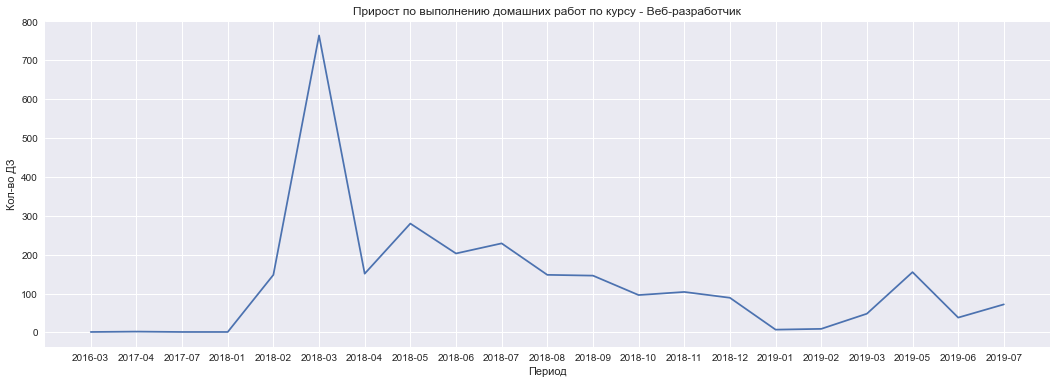

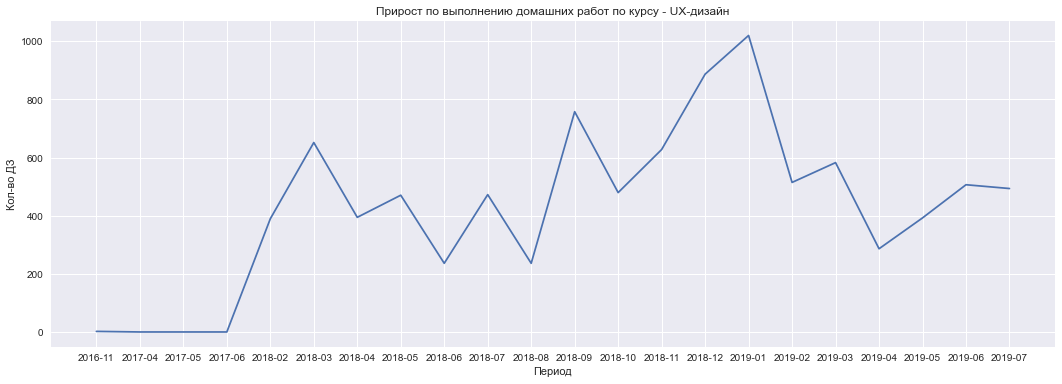

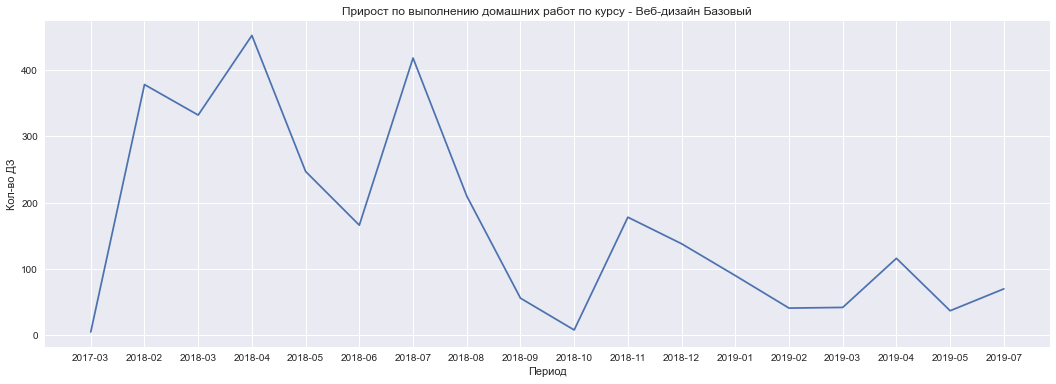

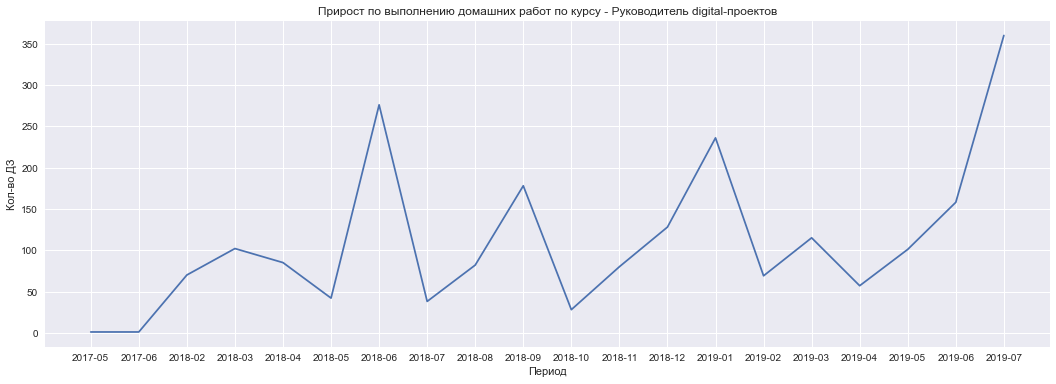

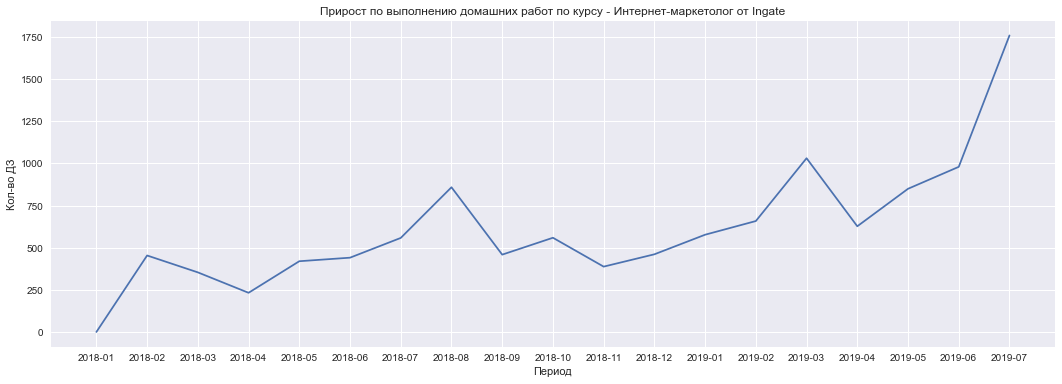

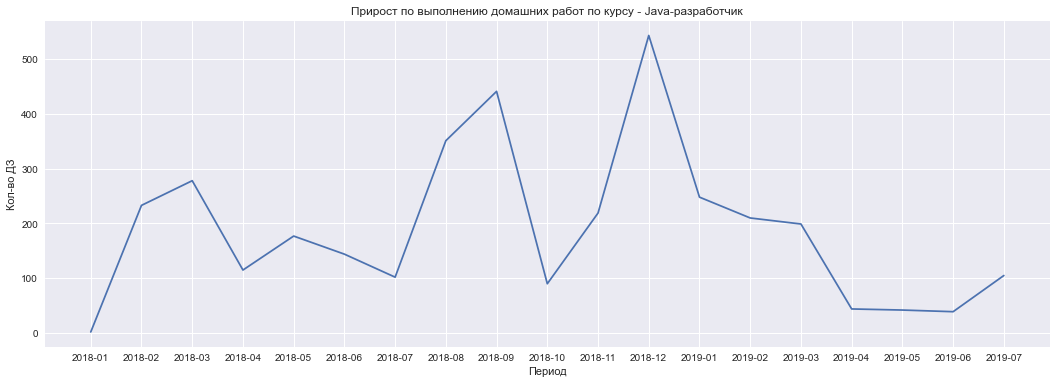

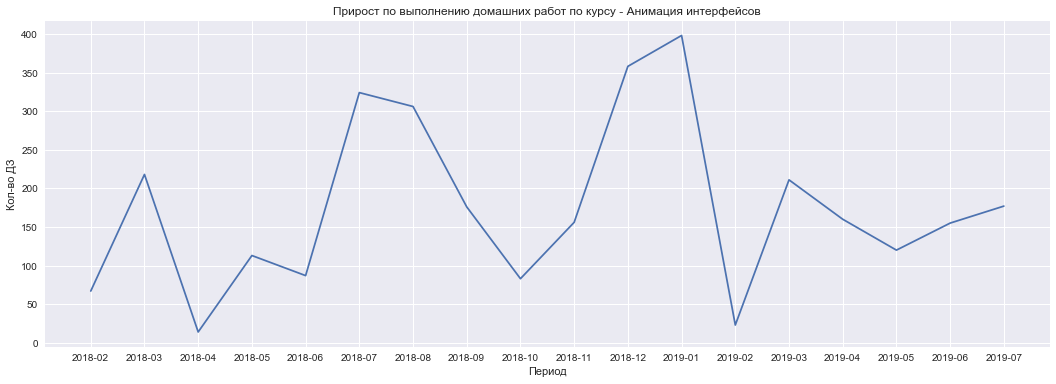

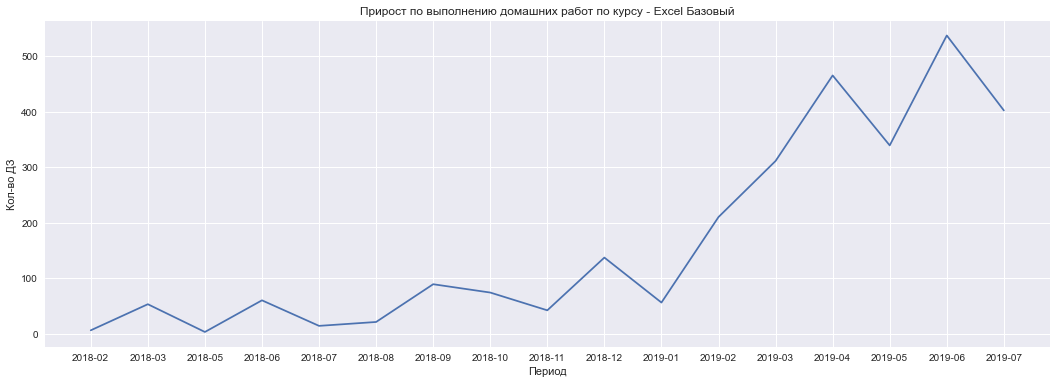

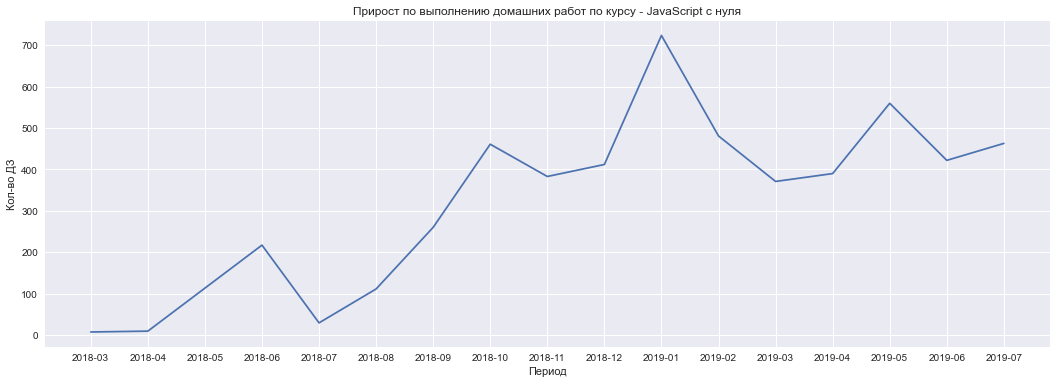

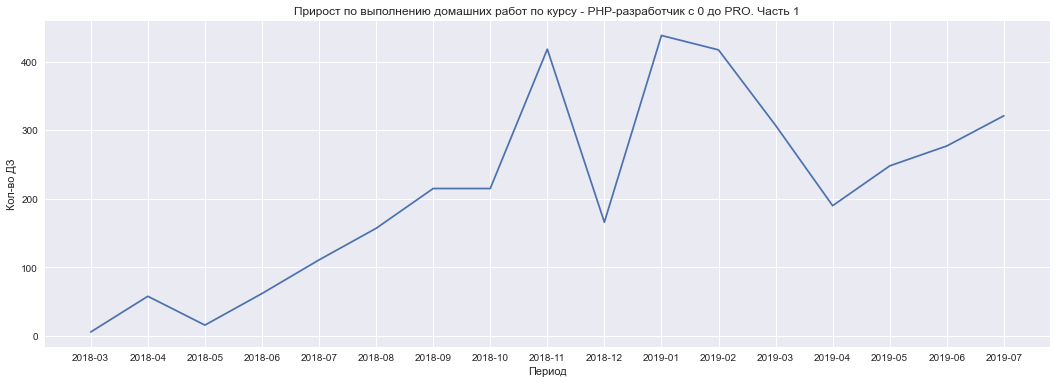

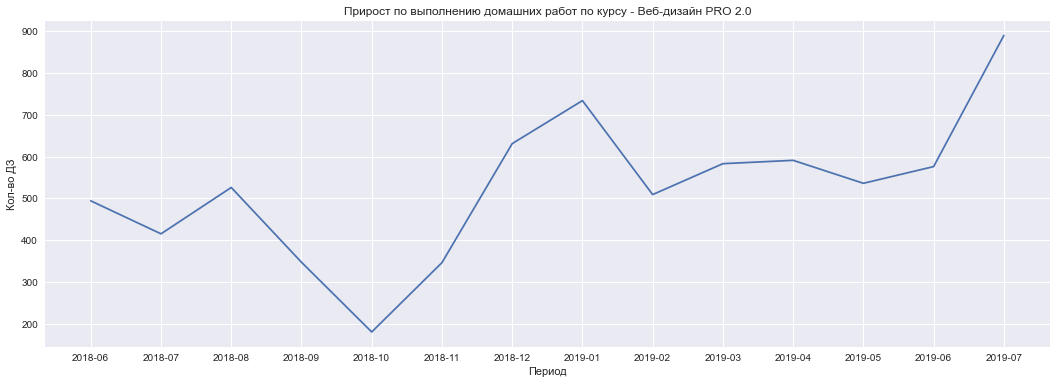

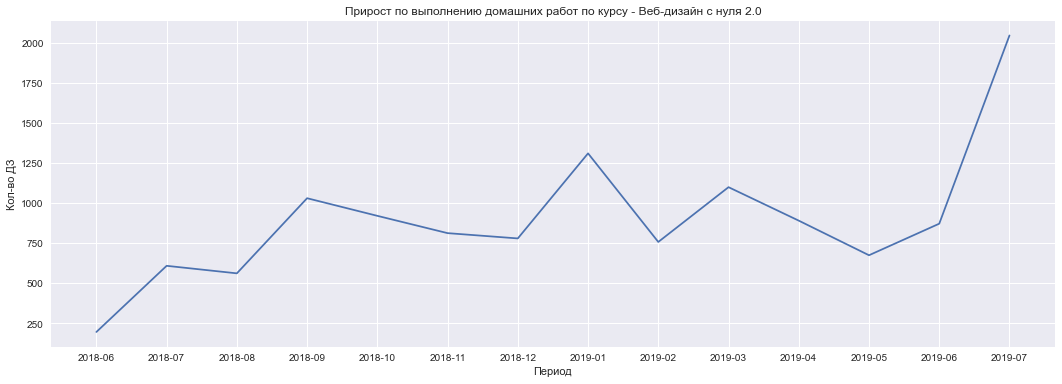

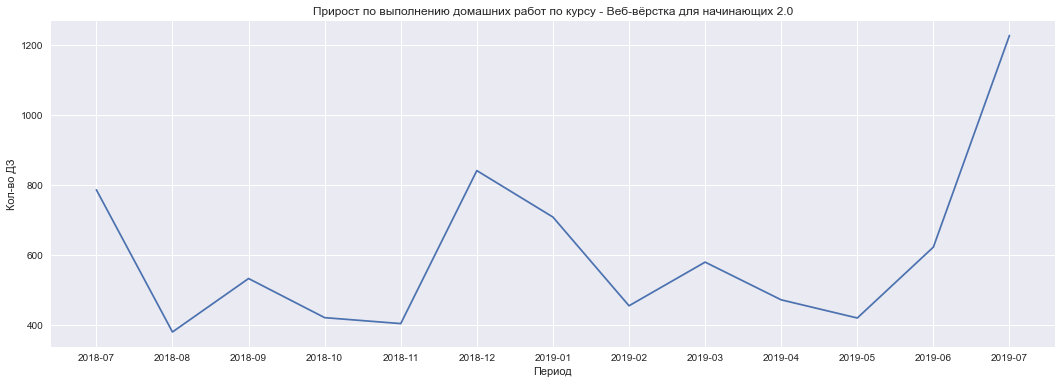

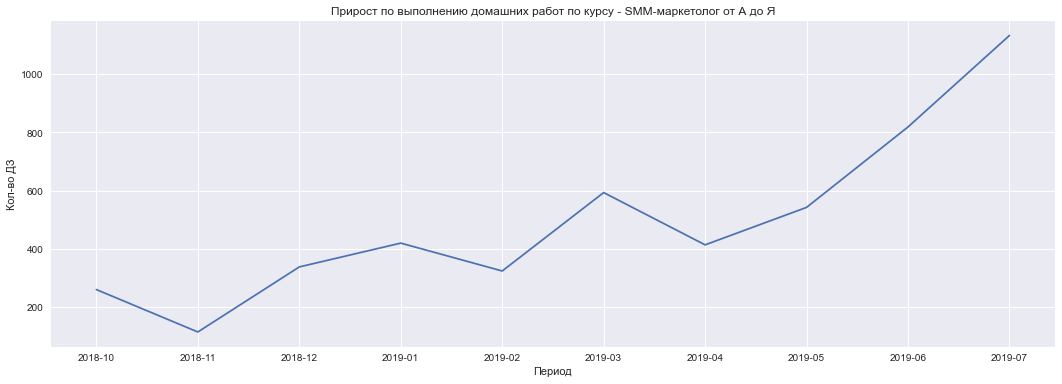

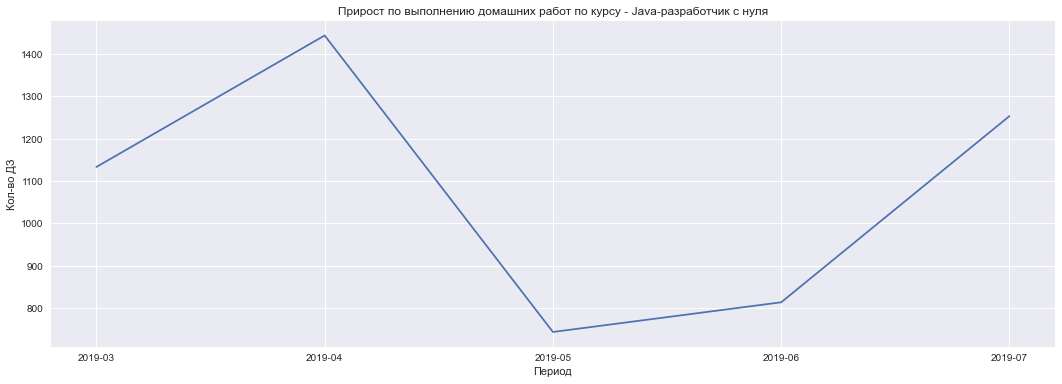

In [156]:
# line-graph количества прогрессов по выполнению домашних работ в каждом месяце за всю историю

for course in courses:
    data = hw[hw['title']==course].groupby(['start_date', 'student_id'])['goal'].sum().reset_index().groupby('start_date')['goal'].sum().reset_index()
    fig, ax = plt.subplots(figsize=(18,6))
    sns.lineplot(data=data, x=data['start_date'].astype(str), y=data['goal'])
    ax.set_title(f'Прирост по выполнению домашних работ по курсу - {course}')
    ax.set_xlabel('Период')
    ax.set_ylabel('Кол-во ДЗ')
    plt.show()

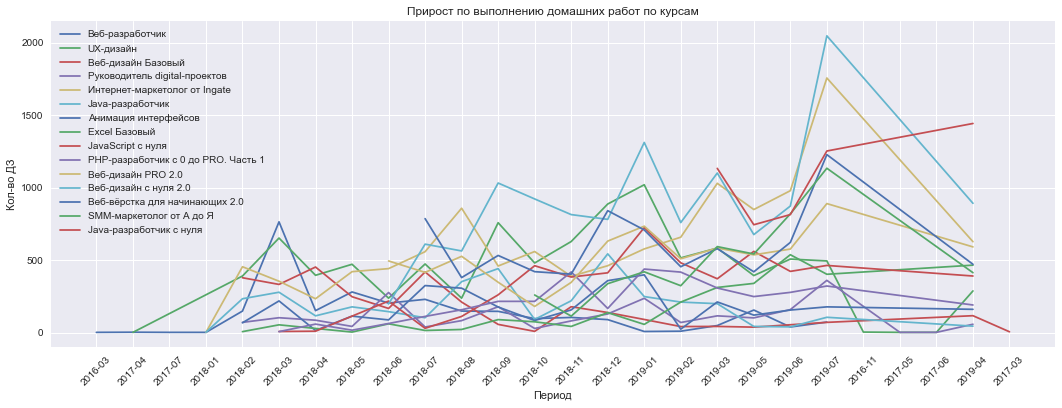

In [158]:
# line-graph количества прогрессов по выполнению домашних работ в каждом месяце за всю историю

fig, ax = plt.subplots(figsize=(18,6))
for course in courses:
    data = hw[hw['title']==course].groupby(['start_date', 'student_id'])['goal'].sum().reset_index().groupby('start_date')['goal'].sum().reset_index()
    sns.lineplot(data=data, x=data['start_date'].astype(str), y=data['goal'])
ax.set_title(f'Прирост по выполнению домашних работ по курсам')
ax.set_xlabel('Период')
ax.set_ylabel('Кол-во ДЗ')
ax.tick_params(axis = 'x', rotation = 45)
ax.legend(courses)
plt.show()

### Выводы модуля 2
1. Основной прирост студентов на курсы приходится на начало 2019 года.
2. Самый приростаемый курс: Веб-дизайн с нуля 2.0 (в пике 230+ чел.), 
    самый мало приростаемый: Веб-дизайн базовый и Анимация интерфейсов (в пике 30+ чел.)

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделать аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [ ]:
### YOUR CODE HERE ###




## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Построить bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок.
3. **(m)** Построить горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделать аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [ ]:
### YOUR CODE HERE ###




## 5. Метрика успеваемости 


Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумать метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [ ]:
### YOUR CODE HERE ###


